# Background frequencies

In [ ]:
from katlas.core import *
import pandas as pd

In [6]:
ks_seqs = Data.get_ks_unique()

In [7]:
st = ks_seqs[ks_seqs.acceptor!='Y']
y = ks_seqs[ks_seqs.acceptor=='Y']

In [8]:
st_pssm = get_prob(st,'site_seq')

In [9]:
y_pssm = get_prob(y,'site_seq')

In [2]:
pSTY2sty?

Signature: pSTY2sty(ref)
Docstring: Convert pS, pT, pY columns to s, t, y for scoring.
File:      ~/katlas/katlas/score.py
Type:      function

In [23]:
def flatten_pssm(pssm_df,
                 use_sty=False, # if True, use s,t,y instead of pS,pT,pY
                ):
    "Flatten PSSM dataframe to dictionary"
    # convert pS,pT,pY to s,t,y
    pssm_df=pssm_df.copy()
    if use_sty: pssm_df.index=pssm_df.index.map(pSTY2sty)
    pssm = pssm_df.unstack().reset_index(name='value')
    # Combine position column and residue identity column as new column for keys
    pssm['position_residue']=pssm.iloc[:,0].astype(str)+pssm.iloc[:,1]
    return pssm.set_index('position_residue')['value'].round(5).to_dict()

In [26]:
st_dict=flatten_pssm(st_pssm,True)

In [27]:
y_dict=flatten_pssm(y_pssm,True)

In [32]:
bg_freq = pd.DataFrame([st_dict,y_dict],index=['ks_ST','ks_Y'])

In [34]:
bg_freq.to_parquet('ks_background.parquet')

In [28]:
st_dict

{'-20P': 0.0705,
 '-20G': 0.06744,
 '-20A': 0.07543,
 '-20C': 0.0152,
 '-20S': 0.05042,
 '-20T': 0.03728,
 '-20V': 0.0538,
 '-20I': 0.04029,
 '-20L': 0.08214,
 '-20M': 0.02163,
 '-20F': 0.03007,
 '-20Y': 0.01711,
 '-20W': 0.00881,
 '-20H': 0.02231,
 '-20K': 0.07013,
 '-20R': 0.05667,
 '-20Q': 0.04554,
 '-20N': 0.03591,
 '-20D': 0.05704,
 '-20E': 0.08077,
 '-20s': 0.03783,
 '-20t': 0.01643,
 '-20y': 0.00726,
 '-19P': 0.06575,
 '-19G': 0.07066,
 '-19A': 0.07217,
 '-19C': 0.01316,
 '-19S': 0.05336,
 '-19T': 0.03642,
 '-19V': 0.05341,
 '-19I': 0.0392,
 '-19L': 0.08355,
 '-19M': 0.02304,
 '-19F': 0.02773,
 '-19Y': 0.01735,
 '-19W': 0.00838,
 '-19H': 0.02031,
 '-19K': 0.07039,
 '-19R': 0.06347,
 '-19Q': 0.04753,
 '-19N': 0.03779,
 '-19D': 0.05359,
 '-19E': 0.0805,
 '-19s': 0.03998,
 '-19t': 0.01607,
 '-19y': 0.00619,
 '-18P': 0.06511,
 '-18G': 0.07001,
 '-18A': 0.07174,
 '-18C': 0.0138,
 '-18S': 0.05194,
 '-18T': 0.03691,
 '-18V': 0.0548,
 '-18I': 0.03987,
 '-18L': 0.08114,
 '-18M': 0.02089,

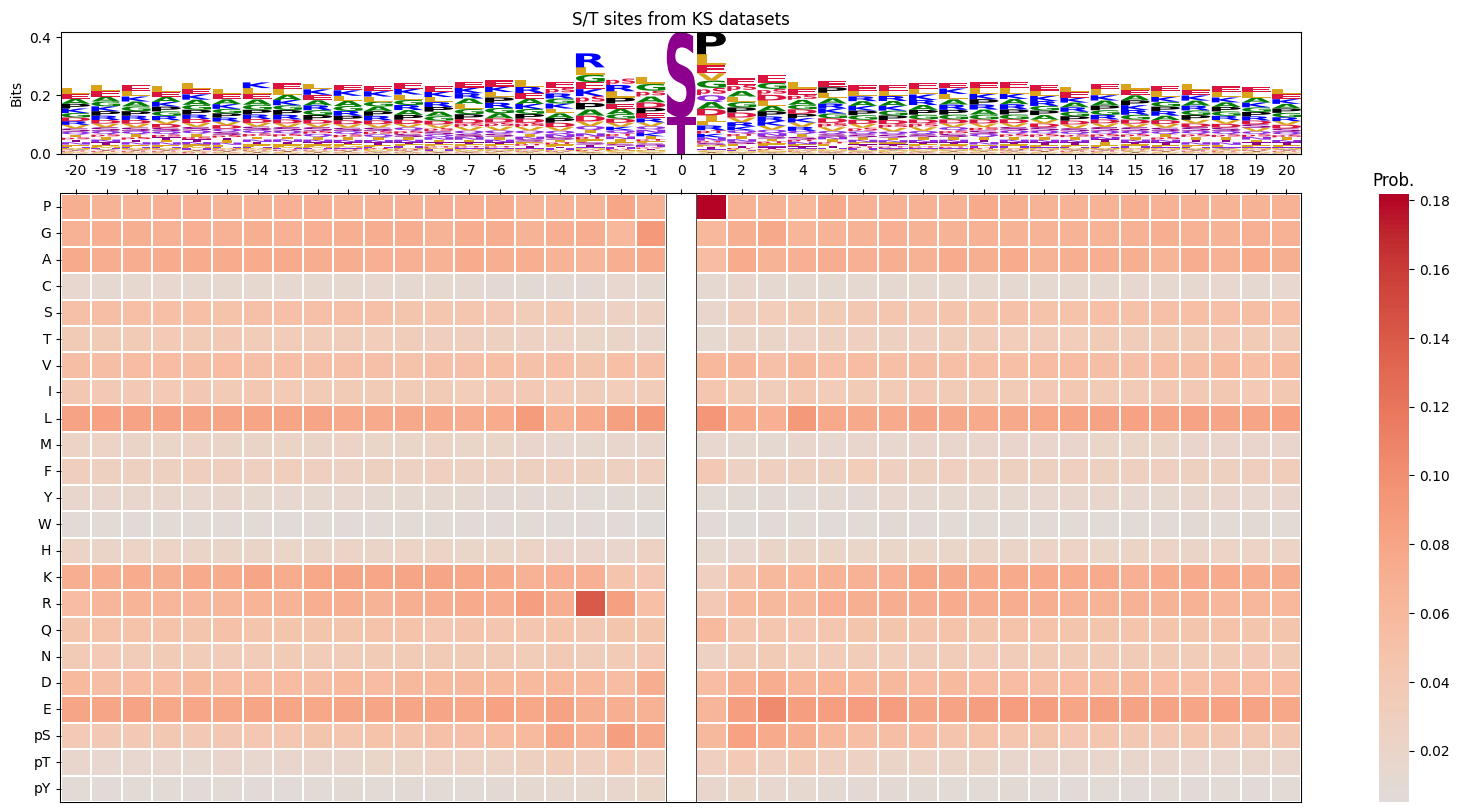

In [10]:
plot_logo_heatmap(st_pssm,'S/T sites from KS datasets',(20,10))

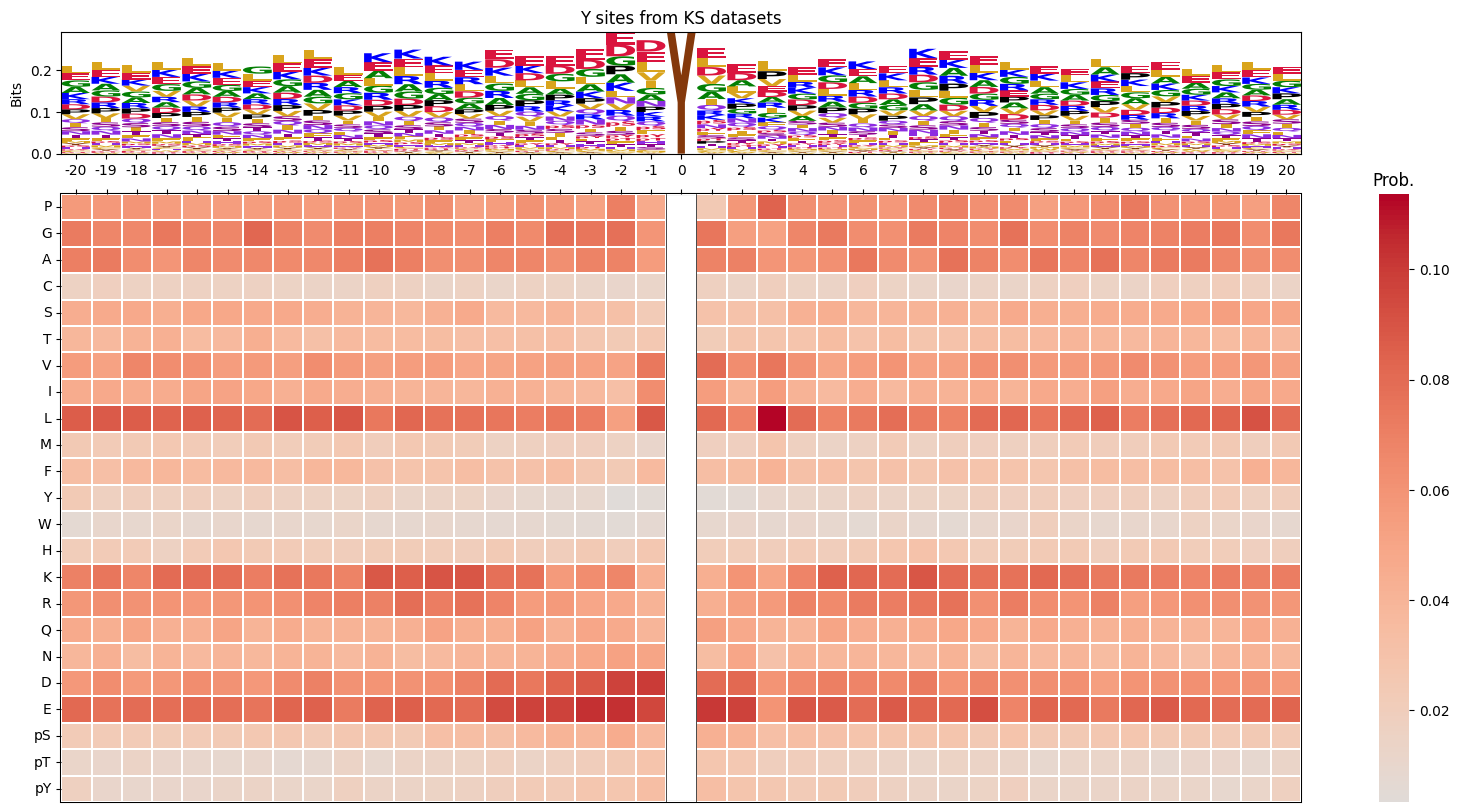

In [11]:
plot_logo_heatmap(y_pssm,'Y sites from KS datasets',(20,10))